In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# Import Avrage income by county and years (2013 -2018) for state of NJ   
csv_path = "Source_File/Average_income_file_nj.csv"
NJ_Avg_income_df = pd.read_csv(csv_path)

NJ_Avg_income_df.head()

,FIPS,State,Area_name,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Median_Household_Income_2013,Employed_2014,Unemployed_2014,Unemployment_rate_2014,...,Unemployment_rate_2016,Median_Household_Income_2016,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018
0,34000,NJ,New Jersey,"4,173,828","374,732",8.2,1396011,"4,183,541","303,497",6.8,...,5.0,1475455,4247535,205990,4.6,1529652,"4,239,567","183,375",4.1,1606570
1,34001,NJ,"Atlantic County, NJ","121,628","16,079",11.7,41664,"117,879","13,907",10.6,...,7.4,44053,110060,8562,7.2,44771,"111,968","7,001",5.9,46557
2,34003,NJ,"Bergen County, NJ","449,009","32,389",6.7,79037,"451,477","25,982",5.4,...,4.2,84309,456948,18500,3.9,88512,"455,773","16,228",3.4,93205
3,34005,NJ,"Burlington County, NJ","215,038","17,917",7.7,74285,"213,837","14,693",6.4,...,4.5,74844,220764,9410,4.1,80081,"218,877","8,568",3.8,86777
4,34007,NJ,"Camden County, NJ","233,809","24,261",9.4,58572,"232,309","19,401",7.7,...,5.5,63589,240342,12875,5.1,65838,"238,357","11,588",4.6,65817


In [4]:
NJ_Avg_income_df.count()

FIPS                            22
State                           22
Area_name                       22
 Employed_2013                  22
 Unemployed_2013                22
Unemployment_rate_2013          22
Median_Household_Income_2013    22
 Employed_2014                  22
 Unemployed_2014                22
Unemployment_rate_2014          22
Median_Household_Income_2014    22
 Employed_2015                  22
 Unemployed_2015                22
Unemployment_rate_2015          22
Median_Household_Income_2015    22
 Employed_2016                  22
 Unemployed_2016                22
Unemployment_rate_2016          22
Median_Household_Income_2016    22
Employed_2017                   22
Unemployed_2017                 22
Unemployment_rate_2017          22
Median_Household_Income_2017    22
Employed_2018                   22
Unemployed_2018                 22
Unemployment_rate_2018          22
Median_Household_Income_2018    22
dtype: int64

In [5]:
# Renaming of data variables 
NJ_Avg_income_df = NJ_Avg_income_df.rename(columns={"State": "State_Id", "Area_name": "County_Name", "Median_Household_Income_2013": "Avg_income_2013", 
                                                          "Median_Household_Income_2014": "Avg_income_2014", "Median_Household_Income_2015": "Avg_income_2015", 
                                                          "Median_Household_Income_2016": "Avg_income_2016", "Median_Household_Income_2017": "Avg_income_2017",
                                                          "Median_Household_Income_2018": "Avg_income_2018"})
NJ_Avg_income_df.head()

,FIPS,State_Id,County_Name,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Avg_income_2013,Employed_2014,Unemployed_2014,Unemployment_rate_2014,...,Unemployment_rate_2016,Avg_income_2016,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Avg_income_2017,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Avg_income_2018
0,34000,NJ,New Jersey,"4,173,828","374,732",8.2,1396011,"4,183,541","303,497",6.8,...,5.0,1475455,4247535,205990,4.6,1529652,"4,239,567","183,375",4.1,1606570
1,34001,NJ,"Atlantic County, NJ","121,628","16,079",11.7,41664,"117,879","13,907",10.6,...,7.4,44053,110060,8562,7.2,44771,"111,968","7,001",5.9,46557
2,34003,NJ,"Bergen County, NJ","449,009","32,389",6.7,79037,"451,477","25,982",5.4,...,4.2,84309,456948,18500,3.9,88512,"455,773","16,228",3.4,93205
3,34005,NJ,"Burlington County, NJ","215,038","17,917",7.7,74285,"213,837","14,693",6.4,...,4.5,74844,220764,9410,4.1,80081,"218,877","8,568",3.8,86777
4,34007,NJ,"Camden County, NJ","233,809","24,261",9.4,58572,"232,309","19,401",7.7,...,5.5,63589,240342,12875,5.1,65838,"238,357","11,588",4.6,65817


In [6]:
NJ_Avg_income_df.columns

Index(['FIPS', 'State_Id', 'County_Name', ' Employed_2013', ' Unemployed_2013',
       'Unemployment_rate_2013', 'Avg_income_2013', ' Employed_2014',
       ' Unemployed_2014', 'Unemployment_rate_2014', 'Avg_income_2014',
       ' Employed_2015', ' Unemployed_2015', 'Unemployment_rate_2015',
       'Avg_income_2015', ' Employed_2016', ' Unemployed_2016',
       'Unemployment_rate_2016', 'Avg_income_2016', 'Employed_2017',
       'Unemployed_2017', 'Unemployment_rate_2017', 'Avg_income_2017',
       'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018',
       'Avg_income_2018'],
      dtype='object')

In [7]:
#Drop variabls that are not required for analysis
NJ_Avg_income_df = NJ_Avg_income_df.drop (["FIPS"," Employed_2013"," Unemployed_2013"," Employed_2014"," Unemployed_2014",
                        " Employed_2015"," Unemployed_2015"," Employed_2016"," Unemployed_2016",
                        "Employed_2017","Unemployed_2017", "Employed_2018","Unemployed_2018"],axis = 1)
NJ_Avg_income_df.head()

,State_Id,County_Name,Unemployment_rate_2013,Avg_income_2013,Unemployment_rate_2014,Avg_income_2014,Unemployment_rate_2015,Avg_income_2015,Unemployment_rate_2016,Avg_income_2016,Unemployment_rate_2017,Avg_income_2017,Unemployment_rate_2018,Avg_income_2018
0,NJ,New Jersey,8.2,1396011,6.8,1419167,5.8,1456315,5.0,1475455,4.6,1529652,4.1,1606570
1,NJ,"Atlantic County, NJ",11.7,41664,10.6,42201,9.6,43244,7.4,44053,7.2,44771,5.9,46557
2,NJ,"Bergen County, NJ",6.7,79037,5.4,82001,4.7,81615,4.2,84309,3.9,88512,3.4,93205
3,NJ,"Burlington County, NJ",7.7,74285,6.4,76868,5.3,80479,4.5,74844,4.1,80081,3.8,86777
4,NJ,"Camden County, NJ",9.4,58572,7.7,57641,6.5,61685,5.5,63589,5.1,65838,4.6,65817


In [8]:
# Data Clean Up Step 1
# Removing total count for NJ State andretainf only county levle counts
NJ_Avg_income_df=NJ_Avg_income_df[NJ_Avg_income_df.County_Name !='New Jersey']
NJ_Avg_income_df.head()

,State_Id,County_Name,Unemployment_rate_2013,Avg_income_2013,Unemployment_rate_2014,Avg_income_2014,Unemployment_rate_2015,Avg_income_2015,Unemployment_rate_2016,Avg_income_2016,Unemployment_rate_2017,Avg_income_2017,Unemployment_rate_2018,Avg_income_2018
1,NJ,"Atlantic County, NJ",11.7,41664,10.6,42201,9.6,43244,7.4,44053,7.2,44771,5.9,46557
2,NJ,"Bergen County, NJ",6.7,79037,5.4,82001,4.7,81615,4.2,84309,3.9,88512,3.4,93205
3,NJ,"Burlington County, NJ",7.7,74285,6.4,76868,5.3,80479,4.5,74844,4.1,80081,3.8,86777
4,NJ,"Camden County, NJ",9.4,58572,7.7,57641,6.5,61685,5.5,63589,5.1,65838,4.6,65817
5,NJ,"Cape May County, NJ",14.3,48691,12.2,49443,11.1,51322,9.8,53981,9.2,55875,8.4,58324


In [9]:
# Data Clean Up Step 2
# Removing "," and "NJ" stings from the data variable to retain only County name.
NJ_Avg_income_df.columns=NJ_Avg_income_df.columns.str.replace('County, NJ','County')

In [10]:
NJ_Avg_income_df['County_Name'] = NJ_Avg_income_df['County_Name'].str.split(",", n=1,expand=True)

In [11]:
NJ_Avg_income_df

,State_Id,County_Name,Unemployment_rate_2013,Avg_income_2013,Unemployment_rate_2014,Avg_income_2014,Unemployment_rate_2015,Avg_income_2015,Unemployment_rate_2016,Avg_income_2016,Unemployment_rate_2017,Avg_income_2017,Unemployment_rate_2018,Avg_income_2018
1,NJ,Atlantic County,11.7,41664,10.6,42201,9.6,43244,7.4,44053,7.2,44771,5.9,46557
2,NJ,Bergen County,6.7,79037,5.4,82001,4.7,81615,4.2,84309,3.9,88512,3.4,93205
3,NJ,Burlington County,7.7,74285,6.4,76868,5.3,80479,4.5,74844,4.1,80081,3.8,86777
4,NJ,Camden County,9.4,58572,7.7,57641,6.5,61685,5.5,63589,5.1,65838,4.6,65817
5,NJ,Cape May County,14.3,48691,12.2,49443,11.1,51322,9.8,53981,9.2,55875,8.4,58324
6,NJ,Cumberland County,11.7,34109,9.9,34349,8.8,35366,7.5,36814,7.0,37408,6.5,38893
7,NJ,Essex County,9.7,54783,8.0,55369,6.9,57817,6.0,60131,5.7,61287,5.2,63554
8,NJ,Gloucester County,9.0,44895,7.3,45826,6.1,47305,5.1,49636,4.7,50589,4.2,52506
9,NJ,Hudson County,7.9,47628,6.4,48344,5.4,51776,4.7,55354,4.4,57081,3.9,59623
10,NJ,Hunterdon County,5.9,103301,4.9,107203,4.3,103876,3.8,102797,3.5,113336,3.3,113083


In [12]:
#Drop variabls that are not required for analysis
NJ_Avg_income_df=NJ_Avg_income_df.drop(["Unemployment_rate_2013","Unemployment_rate_2014",
                                                              "Unemployment_rate_2015","Unemployment_rate_2016",
                                                              "Unemployment_rate_2017","Unemployment_rate_2018",],axis = 1)
NJ_Avg_income_df.head()

,State_Id,County_Name,Avg_income_2013,Avg_income_2014,Avg_income_2015,Avg_income_2016,Avg_income_2017,Avg_income_2018
1,NJ,Atlantic County,41664,42201,43244,44053,44771,46557
2,NJ,Bergen County,79037,82001,81615,84309,88512,93205
3,NJ,Burlington County,74285,76868,80479,74844,80081,86777
4,NJ,Camden County,58572,57641,61685,63589,65838,65817
5,NJ,Cape May County,48691,49443,51322,53981,55875,58324


In [20]:
income_clean=pd.DataFrame(NJ_Avg_income_df[["Avg_income_2013","Avg_income_2014",
                                          "Avg_income_2015","Avg_income_2016",
                                      "Avg_income_2017","Avg_income_2018"]])

pd.options.display.float_format = '{:,.2f}'.format

income_clean

,Avg_income_2013,Avg_income_2014,Avg_income_2015,Avg_income_2016,Avg_income_2017,Avg_income_2018
1,41664,42201,43244,44053,44771,46557
2,79037,82001,81615,84309,88512,93205
3,74285,76868,80479,74844,80081,86777
4,58572,57641,61685,63589,65838,65817
5,48691,49443,51322,53981,55875,58324
6,34109,34349,35366,36814,37408,38893
7,54783,55369,57817,60131,61287,63554
8,44895,45826,47305,49636,50589,52506
9,47628,48344,51776,55354,57081,59623
10,103301,107203,103876,102797,113336,113083


In [34]:
income_hudson=income_clean.iloc[[0,1,2,3,4,5,6,7,8,9,10]]


In [36]:
income_hudson_clean = list(map(int, income_hudson))
income_hudson_clean

TypeError: 'int' object is not iterable

TypeError: 54783 is not a string

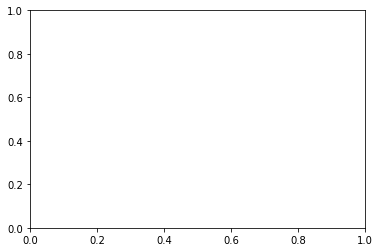

In [19]:
# Create Line Graph to show average Income per count by each year.
years=[2013,2014,2015,2016,2017,2018]

plt.plot(years, income_hudson, marker ='o', color='lightblue', label="Hudson County (Average Income)")
#plt.plot(years, NJ_Avg_income_df, marker ='o', color='orange', label="Essex County (Average Income)")
#plt.plot(years, NJ_Avg_income_df, marker ='o', color='lightgreen', label="Passaic County")
#plt.plot(years, NJ_Avg_income_df, marker ='o', color='violet', label="Monmouth County")




plt.legend(loc="upper left",prop={'size':8})


plt.xlim(2012,2018)
plt.title("Median Income Over 6 Years")
plt.xlabel("Years")
plt.ylabel("Median Income in Dollars")

In [ ]:
#Export the graph to local drive